In [64]:
#definindo imports
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [65]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
data.keys()

data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


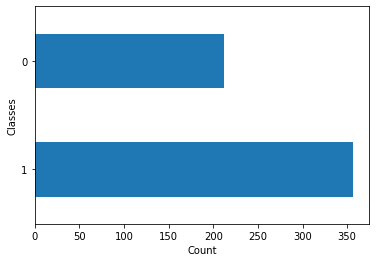

In [66]:
#plotando as classes para ver o tamanho do desbalanceamento
data['class'].value_counts().plot(kind = "barh")
plt.xlabel("Count")
plt.ylabel("Classes")
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler
#passar por um scaler
X = data.drop("class", axis = 1)
Y = data["class"]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = data.drop("class",axis = 1).columns)

In [68]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.33, stratify = Y, random_state = 1)
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(381, 30) (188, 30) (381,) (188,)


In [69]:

class Perceptron(BaseEstimator, ClassifierMixin):
    
    def __init__(self, num_epocas = 10000, taxa_aprendizado = 0.01):
        self.num_epocas = num_epocas
        self.taxa_aprendizado = taxa_aprendizado
        self.bias = 0
        self.pesos = None
        self.erros = None
        self.matriz_pesos = []
        self.acuracia = []
        
    def funcao_treina(self, x):
        
        #insere o bias no vetor de atributos
        x_bias = np.hstack((self.bias, x))
        
        #calcula o campo induzido
        v = np.dot(self.pesos, x_bias)
        
        #calcula a saída do perceptron
        y_aux = self.funcao_ativacao(v)
        
        return y_aux, x_bias

    def funcao_ativacao(self, x):
        return 1 if (np.dot(self.pesos, x) >= self.bias) else 0

    def fit(self, X, Y):
        
        #converte o X e Y para o formato do numpy
        #isso garante funcionamento caso eles venham de dataframe
        X = np.array(X)
        Y = np.array(Y)
        
        #inicia o vetor de pesos
        self.pesos = np.ones(X.shape[1])
        
        max_acuracia = 0

        #para todas as epocas
        for i in range(self.num_epocas):
            k = 0
            for x, y in zip(X, Y):
                
                y_pred = self.funcao_ativacao(x)
                if y == 1 and y_pred == 0:
                    self.pesos = self.pesos + self.taxa_aprendizado * x
                    self.bias  = self.bias  - self.taxa_aprendizado * 1
                elif y == 0 and y_pred == 1:
                    self.pesos = self.pesos - self.taxa_aprendizado * x
                    self.bias  = self.bias  + self.taxa_aprendizado * 1
                
            self.matriz_pesos.append(self.pesos)    
            self.acuracia.append(accuracy_score(self.predict(X), Y))
            if (self.acuracia[i] > max_acuracia):
                max_acuracia = self.acuracia[i]
                chkptw = self.pesos
                chkptb = self.bias
        #checkpoint (Save the weights and b value)
        self.pesos = chkptw
        self.bias  = chkptb
    
    def predict(self, X):
        
        X = np.array(X)        
        result = []
        
        for x in X:
            y_predict = self.funcao_ativacao(x)
            result.append(y_predict)
        
        return np.array(result)

In [70]:
#daqui pra baixo usa o perceptron
perceptron = Perceptron()
perceptron.fit(X_treino, y_treino)

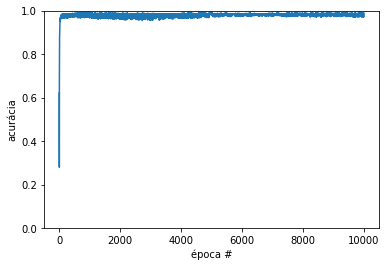

In [71]:
#plota a acurácia
plt.plot(perceptron.acuracia)
plt.xlabel("época #")
plt.ylabel("acurácia")
plt.ylim([0, 1])
plt.show()

In [72]:
#predizendo
Y_pred = perceptron.predict(X_teste)

In [73]:
#resultados
print(accuracy_score(Y_pred, y_teste))

0.9627659574468085
